<a href="https://colab.research.google.com/github/rauman43/Zomato-Restaurant-Clustering/blob/main/Copy_of_Zomato_Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Deepinder Goyal and Pankaj Chaddah created Zomato, an Indian restaurant aggregation and food delivery startup, in 2008. Zomato's restaurant data is analysed for customer sentiment and business expansion in this initiative. It covers important business cases and extracts actionable insights through restaurant segmentation and sentiment analysis. Through the use of metadata and customer reviews, the project seeks to improve eating experiences and pinpoint areas that require improvement. Understanding consumer preferences and grouping restaurants for strategic decision-making are made easier with the help of visualisations. In the end, the initiative helps the varied Indian food business both in terms of customer satisfaction and company development.

# **GitHub Link -**

https://github.com/rauman43/Zomato-Restaurant-Clustering

# **Problem Statement**


Effectively analysing Zomato's restaurant data to comprehend consumer feelings, categorise establishments, and handle business situations is a difficulty. This means taking review data and turning them into useful insights, grouping eateries for tactical planning, and improving service standards all around. In the evolving landscape of the Indian food sector, the objective is to support businesses' growth and enable consumers to make well-informed decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('display.max_columns', None)

#Anamoly detection Tools
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
meta_df_1=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
meta_df_1



,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [ ]:
review_df_2=pd.read_csv('/content/Zomato Restaurant reviews.csv')
review_df_2

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### Dataset First View

In [ ]:
# Dataset First Look
meta_df_1.head()




,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
review_df_2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
meta_df_1.tail()



,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
review_df_2.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("The number of  Rows and Columns in the  Restaurant Dataset",meta_df_1.shape)

The number of  Rows and Columns in the  Restaurant Dataset (105, 6)


In [ ]:
review_df_2.shape
print("The number of Rows and Columns in the Review Dataset",review_df_2.shape)

The number of Rows and Columns in the Review Dataset (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
review_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("The total number of duplicate items in present in Restaurant dataset =",meta_df_1.duplicated().sum())

The total number of duplicate items in present in Restaurant dataset = 0


In [ ]:
print("The total number of duplicate items present in the Review dataset =",review_df_2.duplicated().sum())

The total number of duplicate items present in the Review dataset = 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('---Null values  present in the Restaurant dataset---','\n',meta_df_1.isnull().sum().sort_values(ascending=False))

In [ ]:

print('----Null values in the Reviews dataset---','\n',review_df_2.isnull().sum().sort_values(ascending=False))

In our dataset there 0 duplicate values found

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(16,5))
sns.heatmap(meta_df_1.isnull(), cmap='plasma', annot=False)
plt.title("All the  Missing values in meta  columns")

plt.show()

In [ ]:
# Visualizing Missing Values in Reviews columns
plt.figure(figsize=(5,5))
sns.heatmap(review_df_2.isnull(), cbar=True, yticklabels=True)
plt.xlabel('Name of columns' ,size =15, weight='bold')
plt.title('All the Missing values present in Review Columns')

### What did you know about your dataset?


There are two data sets provided for the analysis. one is based on the information about the various restaurants that uses the Zomato delivery services, the file named as meta data. Another one is based on the reviews given by the customers to those perticular restaurants that are mentioned in the meta data. Meta file has the dimension as 105 rows and 6 columns as variables and the review file has the dimension of 10000 rows and 7 columns. Also there 36 duplicate values in the review file but there are no duplicate values in the meta file. In addition to that there are also missing values in both the dataset.

## ***2. Understanding Your Variables***

In [ ]:
print("The columns present in the Restaurant dataset:\n", meta_df_1.columns)

The columns present in the Restaurant dataset:
 Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [ ]:
print("The columns in the Reviews dataset:\n",review_df_2.columns)

The columns in the Reviews dataset:
 Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
meta_df_1.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Dataset Describe
meta_df_1.describe(include='all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
review_df_2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

# **Zomato Meta Data**

Name: Name of the restaurants

Links : URL links of the restaurants.

Cost:  Per person estimated Cost of dining.

Collection: Tagging of restaurants w.r.t Zomato categories.

Cuisiness: Cuisiness served by the restaurants.

Timings: Restaurant timing.

# **# Zomato Restaurant Reviews**

Restaurant: Name of the restaurants.

Reviewer: Name of the reviewers.

Review: Review text.

MetaData: Reviewer metadata- No. of Reviews and followers.

Time: Date and Time of the review.

Pictures: No.of pictures posted by review.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for item in meta_df_1.columns.tolist():
  print('The number of unique values in column', item, 'is:',  meta_df_1[item].nunique())

The number of unique values in column Name is: 105
The number of unique values in column Links is: 105
The number of unique values in column Cost is: 29
The number of unique values in column Collections is: 42
The number of unique values in column Cuisines is: 92
The number of unique values in column Timings is: 77


In [ ]:
for items in review_df_2.columns.tolist():
  print('The number of unique values in column', items, 'is:')
  print(review_df_2[items].unique())

The number of unique values in column Restaurant is:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm N

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

meta_df_1['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:

# Remove the ',' from the cost varible
meta_df_1['Cost']= meta_df_1['Cost'].str.replace(',','').astype('int64')

In [ ]:
# Top 5 costly restaurant
meta_df_1.sort_values('Cost')[['Name','Cost']].tail()[::-1]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [ ]:
# Top 5 cheap Restaurants
meta_df_1.sort_values('Cost')[['Name','Cost']].head()[::-1]

,Name,Cost
59,KS Bakers,200
101,Sweet Basket,200
54,Asian Meal Box,200
23,Amul,150
89,Mohammedia Shawarma,150


In [ ]:

# spliting the Collection and storing in list
Collections_list = meta_df_1.Collections.dropna().str.split(', ')

In [ ]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [ ]:
 # converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number_of_Restaurants'})


In [ ]:

#top 10 collection
Collections_df.sort_values('Number_of_Restaurants', ascending =False)[:10]

,Tags,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
10,Trending This Week,5
9,Sunday Brunches,4
13,Veggie Friendly,4


# WRANGLING ON CUISINE

In [ ]:

# store type of food in a a list with spliting all the food
cuisine_list =meta_df_1.Cuisines.str.split(', ')

In [ ]:

# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [ ]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})


In [ ]:
#top 10 cuisine
cusine_of_the_data=cuisine_df.sort_values('Number_of_Restaurants', ascending =False)
cusine_of_the_data[:10]

,Type_of_Food,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


# Review :
Wrangling on Rating variable/Feature

In [ ]:
review_df_2['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [ ]:
# convert Like into nan and type  of data
review_df_2.loc[review_df_2['Rating']=='Like']=np.nan
review_df_2['Rating']= review_df_2['Rating'].astype('float')

In [ ]:
# Filling Null values by mean
review_df_2['Rating'].fillna(3.5, inplace=True)
review_df_2['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [ ]:
# Split the Time columns into Year Month and Hours
review_df_2['Year'] = pd.DatetimeIndex(review_df_2['Time']).year
review_df_2['Month'] = pd.DatetimeIndex(review_df_2['Time']).month
review_df_2['Hour'] = pd.DatetimeIndex(review_df_2['Time']).hour
review_df_2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


In [ ]:
# code to find top reviewer
reviewer_list = review_df_2.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_10_reviewers = reviewer_list[:10]
top_10_reviewers

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11
5958,Siva Kumar,10
4259,Priyanka,10
6130,Sravani,10
3134,Manojkumar D Nambisan,10
265,Age Of Foodies (Suraj Karambe),10


In [ ]:
review_df_2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review_df_2.groupby('Restaurant').agg({'Rating':'mean','Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating


,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [ ]:
# Write your code to make your dataset analysis ready.
def remove_outlier(df,column):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('Before removing outliers')
  sns.boxplot(df[column])
  plt.subplot(1,2,1)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean())  / df[column]  .std().__abs__() < 3)]
  df = df[((df[column] - df[column].mean()) / df[column].std().__abs__() > -3)]


  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('After removing outliers')
  sns.boxplot(df[column])
  plt.subplot(1,2,2)
  sns.histplot(df[column])

In [ ]:
# Handling̣ the missing values in meta data
meta_df_1['Cost'] = meta_df_1['Cost'].astype(str)
meta_df_1['Cost'] = meta_df_1['Cost'].str.replace(',','').astype(float)
meta_df_1.drop(['Links', 'Timings'],axis=1)
meta_df_1.rename(columns={'Name' : 'Restaurant'})
meta_df_1['Collections'].fillna('Unknown')


0      Food Hygiene Rated Restaurants in Hyderabad, C...
1                                    Hyderabad's Hottest
2                     Great Buffets, Hyderabad's Hottest
3                                 Late Night Restaurants
4      Best Bars & Pubs, Food Hygiene Rated Restauran...
                             ...                        
100                                              Unknown
101                                              Unknown
102                                              Unknown
103                                              Unknown
104                                 Pan-Asian Delicacies
Name: Collections, Length: 105, dtype: object

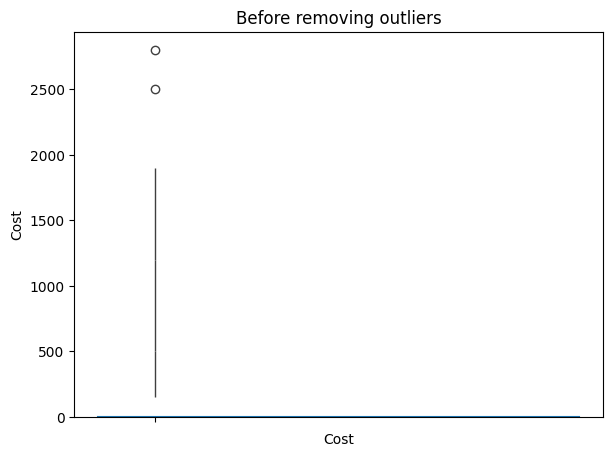

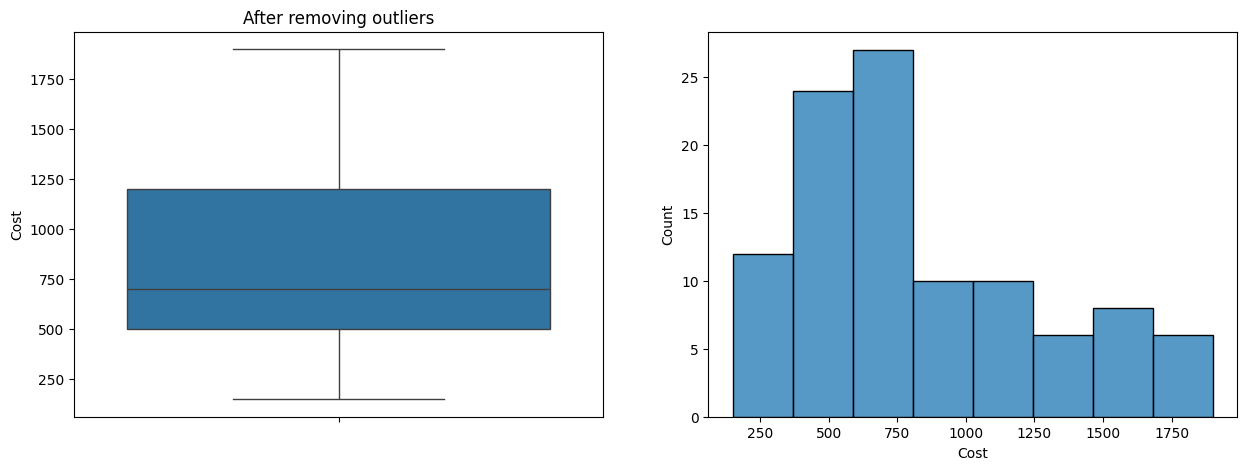

In [ ]:
remove_outlier(meta_df_1,'Cost')

In [ ]:

# Find out the  top 10 costly resturent
Top_10_Expensive_Restaurant=meta_df_1.sort_values('Cost', ascending=False)[['Name', 'Cost']][:10]
Top_10_Expensive_Restaurant

,Name,Cost
33,Club Rogue,900
45,Owm Nom Nom,900
30,Pot Pourri,900
63,Dine O China,850
0,Beyond Flavours,800
1,Paradise,800
50,Gal Punjab Di,800
47,Shanghai Chef 2,800
3,Shah Ghouse Hotel & Restaurant,800
12,Absolute Sizzlers,750


In [ ]:
meta_df_1 = meta_df_1.rename(columns = {'Name':'Restaurant'})
merged_df = pd.merge(meta_df_1,review_df_2, on='Restaurant')

In [ ]:
merged_df

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### What all manipulations have you done and insights you found?

1.Removing the Outliers.

2.Drop the unneccessary columns as Links and Timings.

3.Renamed the Column Name in Meta File as Restaurant.

4.Filled the missing values in Collections column as 'Unknown'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
meta_df_1.head(5)

In [ ]:
Top_10_costly_rest = meta_df_1[['Restaurant', 'Cost']].groupby('Restaurant', as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

#### Chart - 1

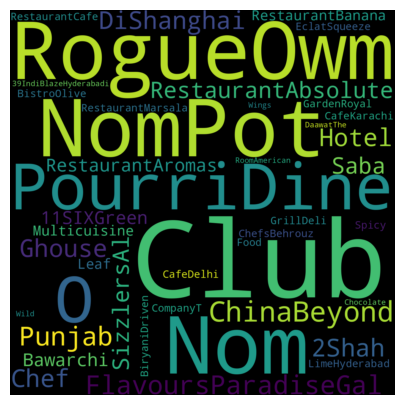

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import WordCloud class
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(15,5))
text="".join(name for name in meta_df_1.sort_values('Cost', ascending= False).Name[:30])
word_cloud = WordCloud(width=1400, height=1400, collocations=False, background_color='black').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

As a result of its concise representation of the terms that appear most frequently in the text data, it offers a clear, aesthetically pleasing method for understanding important themes or subjects within the dataset.

##### 2. What is/are the insight(s) found from the chart?

insights showing which words or phrases are most frequently used in capital letters to make things easier for fancy eateries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will improve comprehension of prevailing themes or issues and have a favourable impact on company.




#### Chart - 2

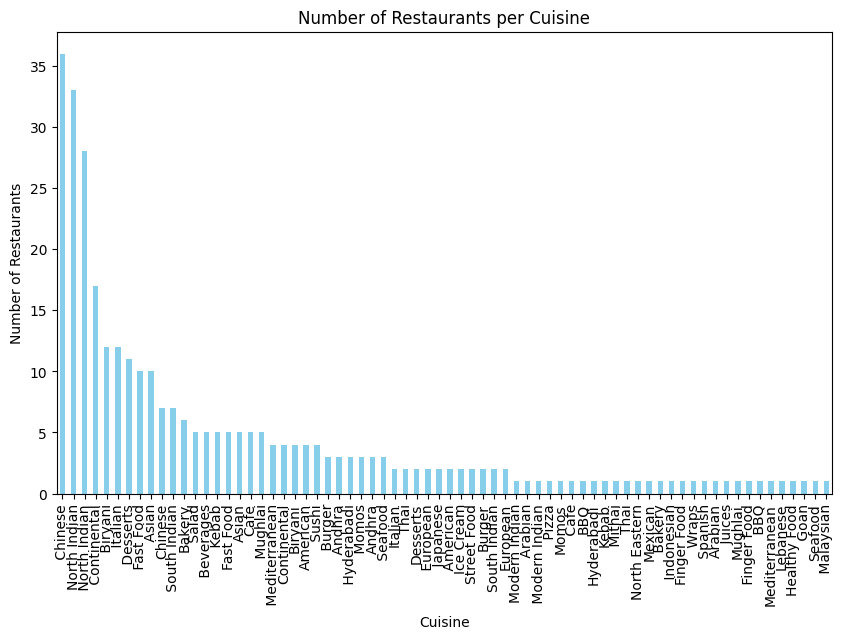

In [ ]:
# Chart - 2 visualization code
cuisine_counts = meta_df_1['Cuisines'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To Showcase the number of restaurants by cuisine.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants are dominated by Chinese cuisine..

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Affect:
Makes a difference recognize prevalent cuisines for focused on promoting.

Negative Development:
Over-saturation of Chinese eateries may lead to strongly competition.

#### Chart - 3

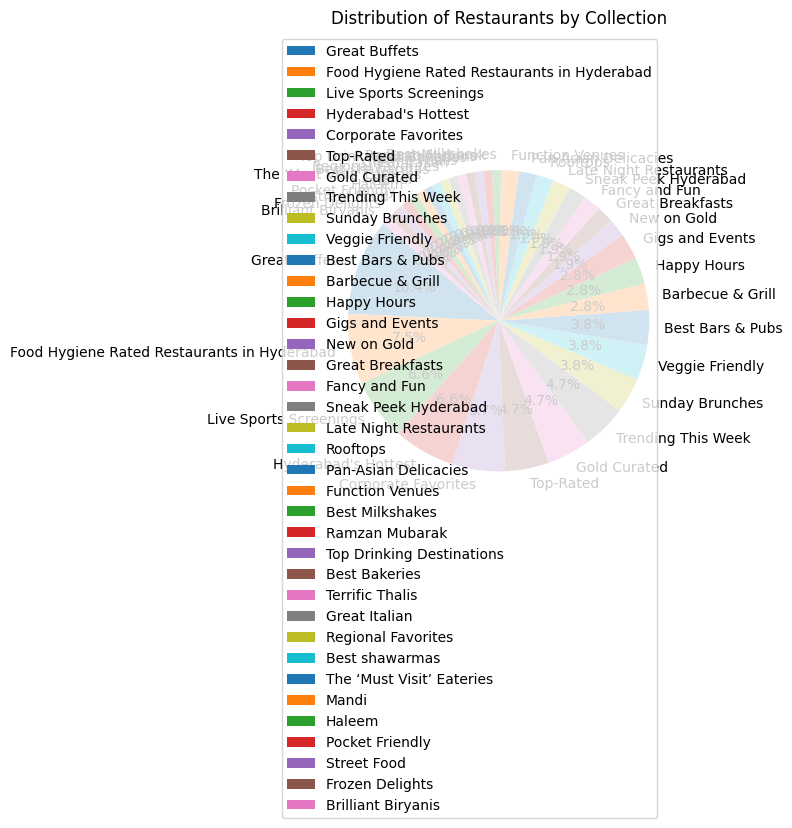

In [ ]:
# Chart 3 visualization code
collection_counts = meta_df_1['Collections'].str.split(', ', expand=True).stack().value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(collection_counts, labels=collection_counts.index, autopct='%1.1f%%', startangle=140)
plt.gca().set_aspect("equal")
plt.title('Distribution of Restaurants by Collection')
plt.axis('equal')
plt.legend(collection_counts.index, loc='best')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The circular shape of the pie chart allows us to compare the relative sizes of different collections easily.



##### 2. What is/are the insight(s) found from the chart?

* We can observe the proportion of each restaurant collection within the dataset.
* The chart provides a visual representation of how the collections are distributed.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can be valuable for decision-making:
* If a specific collection dominates the chart (e.g., “Fine Dining”), it suggests that focusing on or expanding that collection could be beneficial.
* Identifying popular collections allows for targeted marketing efforts, menu adjustments, or special promotions.


#### Chart - 4

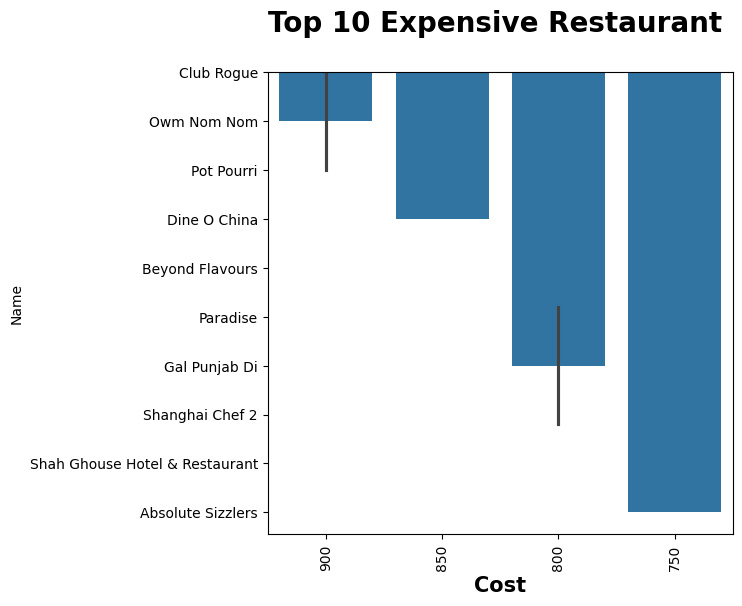

In [ ]:
# Chart - 4 visualization code
# Top 10 Expensive Restaurants
plt.figure(figsize=(6,6))
x = Top_10_Expensive_Restaurant['Cost']
y = Top_10_Expensive_Restaurant['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Resaturant",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()



##### 1. Why did you pick the specific chart?

 A Bar chart, which is effective for comparing values across different categories.

##### 2. What is/are the insight(s) found from the chart?

* We can observe the cost distribution among the top 10 expensive restaurants.
* The chart provides a clear view of how each restaurant’s cost compares to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifying the most expensive restaurants helps target high-end customers.
* Marketing efforts can focus on these exclusive dining experiences.
* Pricing strategies can be adjusted based on the competition.

#### Chart - 5

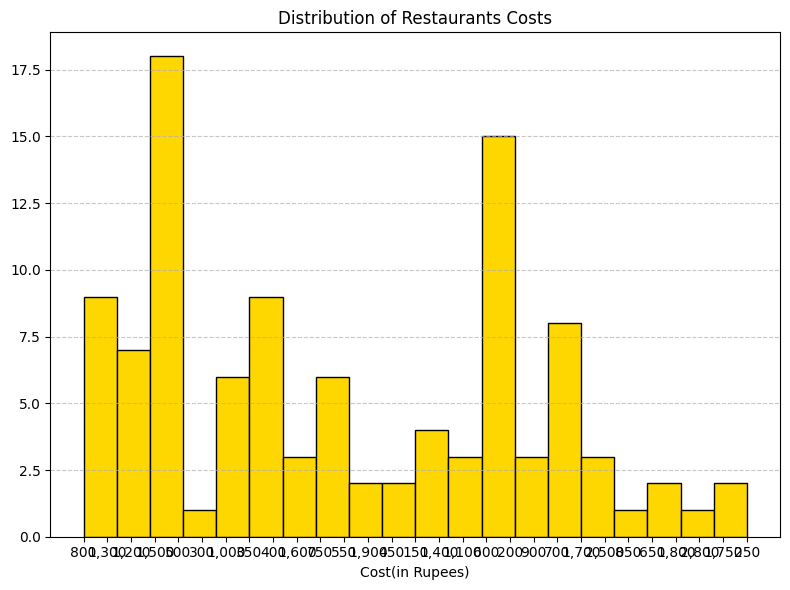

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,6))
plt.hist(meta_df_1['Cost'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Restaurants Costs')
plt.xlabel('Cost(in Rupees)')
plt.ylabel=('Frequency')
plt.grid(axis='y',  linestyle='--', alpha =0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is suitable for visualizing the distribution of a continuous variable (in this case, restaurant costs).
* The bars represent the frequency of different cost ranges.

##### 2. What is/are the insight(s) found from the chart?

* We can observe how the restaurant costs are distributed.
* The chart provides a clear view of the concentration of costs within specific ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the cost distribution helps in pricing strategies.
Identifying common cost ranges allows for targeted marketing efforts.
* Adjusting menu prices based on the most frequent cost range can attract more customers.

#### Chart - 6

TypeError: 'str' object is not callable

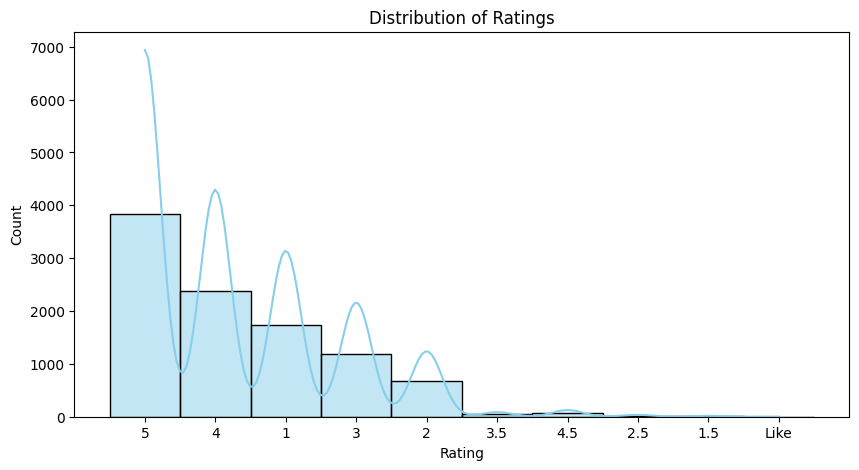

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.histplot(review_df_2['Rating'], bins =10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

* The histogram is an excellent choice for visualizing the distribution of a continuous variable (in this case, restaurant ratings).
* By using bins, we can see how ratings are distributed across different ranges.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the frequency of ratings (e.g., how many restaurants fall into each rating range).
* We can observe whether ratings are concentrated in specific intervals or evenly distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the distribution of ratings helps identify popular rating ranges.
* High ratings (e.g., 4.5 to 5 stars) can be leveraged for marketing and customer satisfaction.
* Targeted efforts can be made to improve ratings in lower ranges.

#### Chart - 7

KeyError: 'Year'

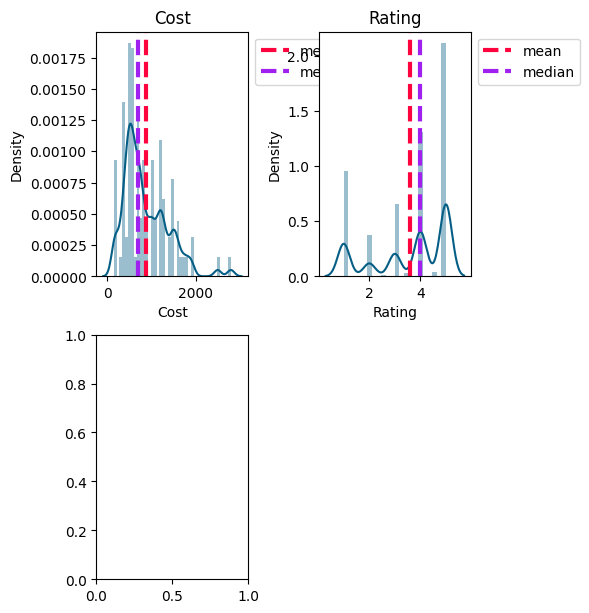

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (6,6));
for i,col in enumerate(['Cost','Rating','Year']) :
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85');
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

These histograms provide insights into the distribution of each feature in your dataset. The mean and median lines help you understand the central tendency of each feature.

##### 2. What is/are the insight(s) found from the chart?

* The histogram shows the distribution of costs.
* The dashed lines represent the mean (red) and median (cyan) values.
* If the distribution is skewed, the mean and median might differ significantly.
* If the distribution is symmetric, the mean and median will be close.
You can use this chart to understand the central tendency of the cost data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the cost distribution can help businesses optimize pricing strategies.
* If there are high-cost outliers, identifying and addressing them could lead to better profitability.
* Consistent high ratings suggest customer satisfaction. Businesses can leverage this positive sentiment for marketing and customer retention.


**Negative Impact:**

* If there’s a decline in ratings over time, it could signal customer dissatisfaction or a decline in product/service quality. Addressing this issue promptly is crucial.

#### Chart - 8

TypeError: 'str' object is not callable

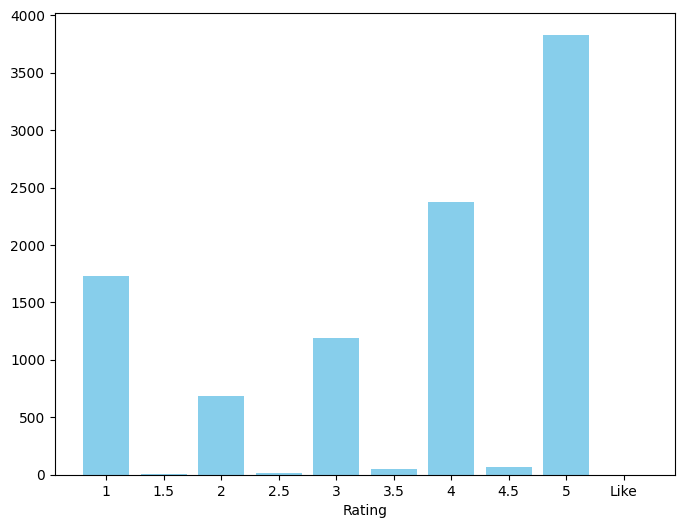

In [ ]:
# Chart - 8 visualization code
rating_counts = review_df_2['Rating'].value_counts().sort_index()

#Bar Chart
plt.figure(figsize=(8,6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart provides an overview of the distribution. The vertical bar chart created effectively displays the distribution of ratings

##### 2. What is/are the insight(s) found from the chart?

* The chart allows you to quickly identify which ratings are most common and which are less frequent.
* If you observe a tall bar for a specific rating (e.g., 5 stars), it indicates that many users gave that high rating.
* Conversely, shorter bars for lower ratings (e.g., 1 or 2 stars) suggest that fewer users provided those ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive Business Impact:**
* If the majority of ratings are high (e.g., 4 or 5 stars), it indicates that customers are generally satisfied with the product or service. This positive sentiment can lead to increased customer loyalty, word-of-mouth referrals, and repeat business.

* Positive reviews can also enhance the brand’s reputation and attract new customers.


**Negative Growth Insights:**

* If there’s a significant number of low ratings (e.g., 1 or 2 stars), it suggests dissatisfaction among customers. This could lead to negative consequences:
* Decreased Sales: Unhappy customers may stop purchasing or switch to competitors.
Reputation Damage: Negative reviews can harm the brand’s image and discourage potential customers.

#### Chart - 9

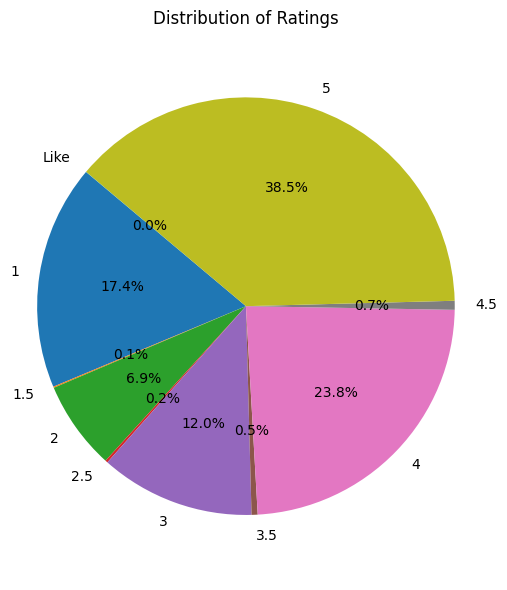

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(5,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* A pie chart is suitable for showing the distribution of a categorical variable (in this case, different rating levels).
* It allows us to visualize the proportion of each category relative to the whole (total number of ratings).


##### 2. What is/are the insight(s) found from the chart?

* Positive Ratings: The majority of ratings fall into the positive category, which indicates that most people had a favorable experience.
* Neutral Ratings: There’s a smaller slice for neutral ratings, suggesting that some users had a mixed or average experience.
* Negative Ratings: The smallest slice represents negative ratings, implying that only a few users had a negative experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Ratings:**

These constitute the majority of the ratings. Positive feedback indicates that most users had a favorable experience with the product or service.

**Business Impact:**

Positive ratings can lead to increased customer loyalty, word-of-mouth referrals, and improved brand reputation. This can positively impact sales and revenue.

**Neutral Ratings:**

The smaller slice represents neutral ratings. These indicate that some users had a mixed or average experience.

**Business Impact:**

 While neutral ratings are not necessarily negative, they may not contribute significantly to growth. The business should aim to convert these neutral experiences into positive ones by addressing any issues.
Negative Ratings:

The smallest slice corresponds to negative ratings. These imply that only a few users had a negative experience.

Business Impact:

Negative ratings can be detrimental. They may lead to customer churn, damage the brand’s image, and result in lost revenue. It’s crucial to investigate the reasons behind these negative experiences and take corrective actions promptly.

#### Chart - 10

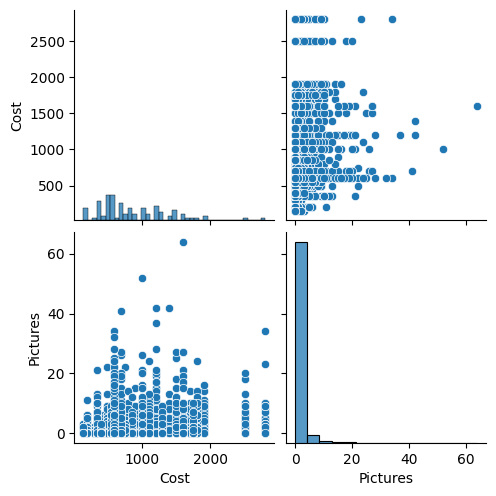

In [ ]:
# Chart - 10 visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

The sns.pairplot(merged_df) command generates a scatter plot matrix, which displays pairwise relationships between numerical variables in the merged_df DataFrame.

Each scatter plot in the matrix represents the relationship between two variables, and the diagonal plots show the distribution of each variable.

##### 2. What is/are the insight(s) found from the chart?

* Correlation: By examining the scatter plots, you can identify whether there is a positive or negative correlation between pairs of variables.
* Distribution: The diagonal plots provide information about the distribution of each variable. You can see whether the data is skewed, normally distributed, or has outliers.
* Outliers: Outliers can be detected by looking for points that deviate significantly from the general pattern in the scatter plots.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Correlation: If we observe strong positive correlations between certain variables , this could indicate that increasing one variable positively affects the other. For instance, higher marketing spend might lead to increased revenue.
* Negative Correlation: Conversely, negative correlations suggest an inverse relationship. Addressing the negative correlation could improve business outcomes.

#### Chart - 11

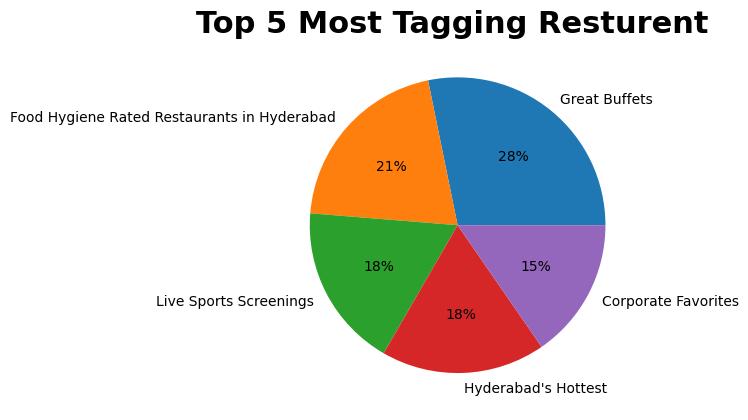

In [ ]:
# Chart - 11 visualization code
collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Tags'].tolist()[:5]
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False) ['Number_of_Restaurants'].tolist()[:5]
labels = collection_list


#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Tagging Resturent ', size =22, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* Pie charts are commonly used to represent parts of a whole. They show how individual components contribute to the total.

* The distribution of restaurants based on their tags, so a pie chart can effectively convey this information.
* Data Representation:

* Each slice of the pie represents a restaurant tag.
* The size of each slice corresponds to the proportion of restaurants with that specific

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the proportion of each tag among the top 5.

* Insights:

From the chart, we can observe which tags dominate the restaurant scene in your dataset.
I
f one tag has a significantly larger slice, it suggests that restaurants with that specific tag are more popular or numerous

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Business Impact:**

Dominant Tags: If  tags  have large slices, it indicates that these types of restaurants are popular. This insight can be leveraged for targeted marketing efforts.

Customer Preferences: Understanding which tags are prevalent helps tailor menus, promotions, and customer experiences. For instance, if “Vegetarian” restaurants are popular, offering more vegetarian options could attract more customers.

#### Chart - 12

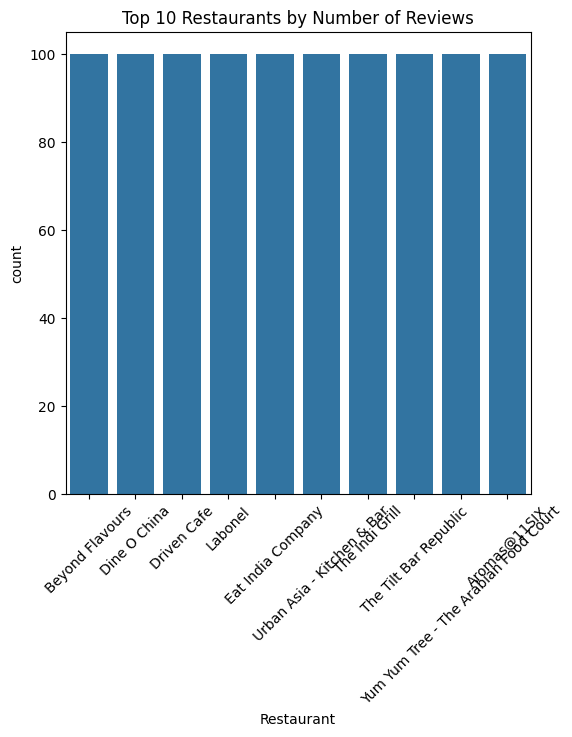

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(6, 6))
sns.countplot(x='Restaurant', data=review_df_2, order=review_df_2['Restaurant'].value_counts().index[:10])
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The chart you’ve shared appears to be a bar plot showing the top 10 restaurants based on the number of reviews.
The x-axis represents the restaurant names, and the y-axis represents the count of reviews.
The bars indicate how many reviews each restaurant has received. The specific choice of this chart might be because it effectively visualizes the comparison between different restaurants in terms of review counts.

##### 2. What is/are the insight(s) found from the chart?

* Popularity: The restaurants with the highest number of reviews are likely to be popular among customers. These establishments have attracted a significant amount of attention and feedback.
* Customer Engagement: Restaurants with more reviews tend to have a higher level of customer engagement. Frequent reviews indicate that patrons are actively sharing their experiences, whether positive or negative.
* Variety: The chart shows a diverse set of restaurants. Some may specialize in specific cuisines, while others offer a broader range of options. The variety suggests that customers have different preferences and are exploring various dining options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Feedback**

* Popularity Boost: Restaurants with high review counts are likely to attract more customers. Positive reviews can enhance their reputation and encourage new patrons to visit.
* Increased Revenue: Higher customer engagement and popularity can lead to increased footfall and revenue. Satisfied customers may also recommend the restaurant to others.
* Feedback Loop: Frequent reviews provide valuable feedback. Restaurants can use this information to improve their offerings, address customer concerns, and refine their services.

**Negative Impacts**

* Quality Control Challenges: While popularity is positive, managing quality becomes crucial. High review counts mean more scrutiny. If the restaurant fails to maintain consistency, negative reviews could harm its reputation.
* Negative Reviews: Even popular restaurants receive negative feedback. These reviews can impact potential customers’ decisions.

#### Chart - 13

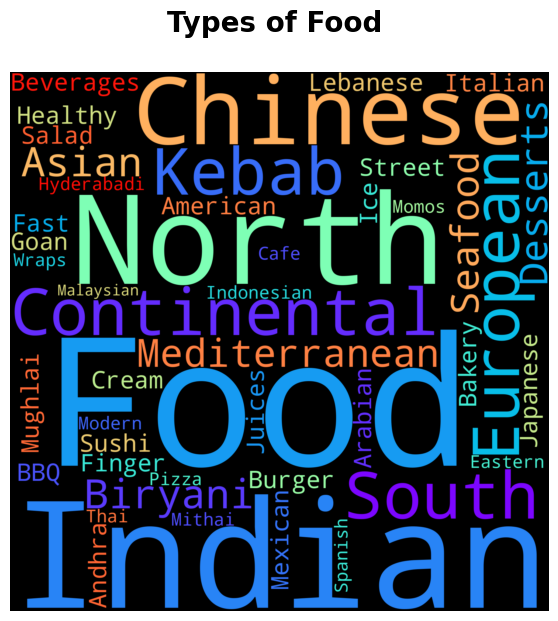

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(7,7))
text = " ".join(name for name in cuisine_df.Type_of_Food )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000, collocations = False, colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud


plt.title('Types of Food \n',fontsize=20, weight = 'bold')
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off")

##### 1. Why did you pick the specific chart?

A word cloud is good for visual representation of a text, Here the words which appear bigger are more often mentioned. Word clouds will be great for visualizing unstructured text data.

##### 2. What is/are the insight(s) found from the chart?

Word chart can clearly say word bigger is more oftenly used and the more oftenly used words like North, Indian Food, Chinese, Biryani, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Word chart will help in promotion with direct analysis

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# Convert the 'Rating' column to numeric
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'])

# Fit the linear model
model = smf.ols(formula='merged_df["Rating"] ~ merged_df["Cost"]', data=merged_df).fit()

# Get the p-value
p_value = model.pvalues[1]

# Interpret the results
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have examined the association between a restaurant's price and rating using the linear regression test.

##### Why did you choose the specific statistical test?

I choose this test because it is a widely used and simple technique to determine whether two continuous variables are related. To do this, a linear model would need to be fitted, with the cost acting as the independent variable and the rating as the dependent variable. The presence or absence of a statistically significant association between the two variables can then be ascertained using the p-value of the cost variable's coefficient.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average rating for restaurants with pictures is the same as those without pictures.

Alternative Hypothesis (H1): The average rating for restaurants with pictures is different from those without pictures.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Splitting the dataset into two groups based on the presence of pictures
with_pictures = review_df_2[review_df_2['Pictures'] > 0]['Rating']
without_pictures = review_df_2[review_df_2['Pictures'] == 0]['Rating']

# Performing the independent t-test
t_statistic, p_value = stats.ttest_ind(with_pictures, without_pictures, equal_var=False)

# Checking the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average rating for restaurants with pictures is different from those without pictures.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average rating between restaurants with and without pictures.")



Fail to reject the null hypothesis: There is no significant difference in the average rating between restaurants with and without pictures.


##### Which statistical test have you done to obtain P-Value?

The independent samples t-test is the statistical procedure used to get the p-value.

##### Why did you choose the specific statistical test?

This statistical test   may be used to compare the means of two independent groups and ascertain whether there is a statistically significant difference between them, the independent samples t-test was selected. Since the average ratings for restaurants with and without photos are being compared in this instance, the independent samples t-test is a suitable statistical method for this type of analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])[:1]

Rating,1,1.5,2,2.5,3,3.5,4,4.5,5,Like
Cuisines,,,,,,,,,,
American,1,0,1,0,2,0,8,0,88,0


##### Which statistical test have you done to obtain P-Value?

To evaluate the relationship between a restaurant's rating and the range of cuisines it offers, I employed the chi-squared test for independence in order to investigate the third hypothesis.

##### Why did you choose the specific statistical test?

This test is appropriate for comparing the association between two category variables, which is why I chose it. This would include making a contingency table where the rows represent the number of restaurants that serve each cuisine and the columns represent the restaurant's rating.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check the duplcate values persent in the data set
print(f'Total number of Duplicate Value present in Restaurant dataset {meta_df_1.duplicated().sum()} \n')
print(f'Total number of Duplicate Value present in Review dataset {review_df_2.duplicated().sum()}')

Total number of Duplicate Value present in Restaurant dataset 0 

Total number of Duplicate Value present in Review dataset 36


In [ ]:
review_df_2.drop_duplicates(inplace= True)
# check the duplcate value after drop
print(f'Total number of Duplicate Value present in Restaurant dataset  {meta_df_1.duplicated().sum()} \n')
print(f'Total number of Duplicate Value present in Review datast set {review_df_2.duplicated().sum()}')


Total numer of Duplicate Value present in Restaurant dataset  0 

Total numer of Duplicate Value present in Review datast set 0


# Handle Missing values from Restaurants Dataset

In [ ]:
# Handling Missing Values & Missing Value Imputation
meta_df_1.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Fill null values with mode
meta_df_1.Timings.fillna(meta_df_1.Timings.mode()[0],inplace=True)

In [ ]:
# check percentage of missing values  in Collections
missing_percentage = ((meta_df_1['Collections'].isnull().sum())/(len(meta_df_1['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')


Percentage of missing value in Collections is 51.43%


In [ ]:
# More then 50% of the data is missing so we are droping the colllection collumns
meta_df_1.drop('Collections', axis=1, inplace = True)
meta_df_1.isnull().sum()


Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

# Handle Missing values from Review Dataset

In [ ]:
review_df_2.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [ ]:
review_df_2[review_df_2['Reviewer'].isnull()]


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
review_df_2 = review_df_2.dropna(subset=['Reviewer','Review','Rating'])
review_df_2.isnull().sum()



Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I began by eliminating duplicate values from the review dataset and taking care of any missing values from the restaurant and review datasets.

One null value in the time feature and more than 50% in the collection feature were found in the restaurant-related dataset. Since there was only one null and mode is robust to outliers, I started by replacing the timing null value with the mode. Additionally, since the hotel name was the sole unique feature that possessed all other features except timing and collection, it was best to keep that data. I eliminated the entire column since the collection feature had more than 50% null values because columns with a high percentage of null values typically have a large amount of missing data, which might make it challenging to evaluate the data properly or generate predictions from it.


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged_df['Cost'].skew())
print("Kurtosis - Cost: %f" % merged_df['Cost'].kurt())

Skewness - Cost: 1.150702
Kurtosis - Cost: 1.556680


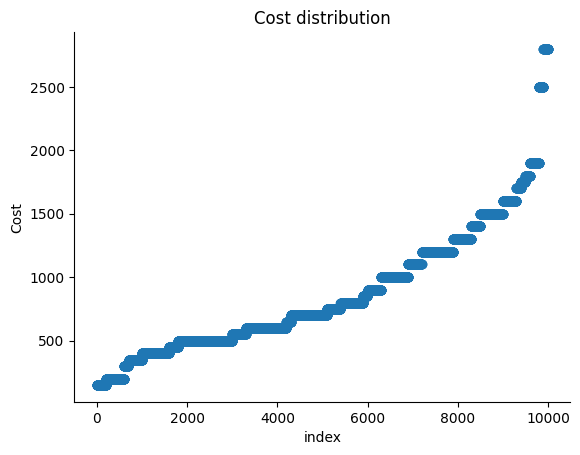

In [ ]:
# Scatter Plot of Cost
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


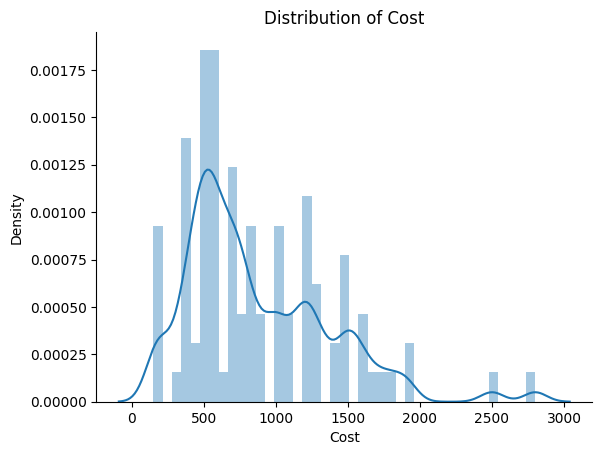

In [ ]:
#distribution of cost
sns.distplot(merged_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_df['Cost'].values.reshape(-1, 1))
merged_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged_df['Cost'].values.reshape(-1, 1))
merged_df['outlier_univariate_Cost'] = isolation_forest.predict(merged_df['Cost'].values.reshape(-1, 1))

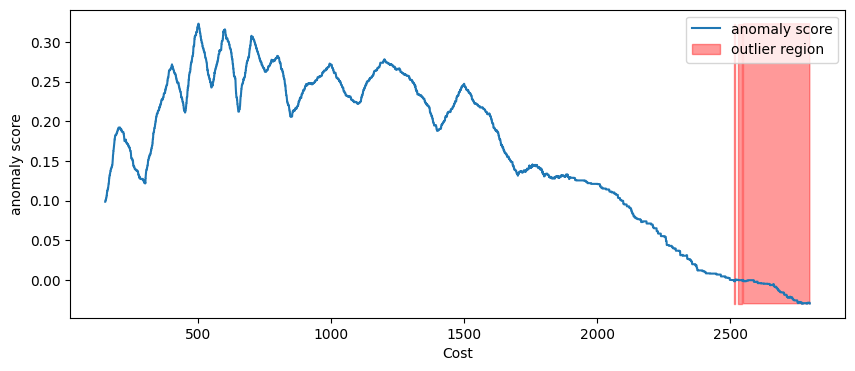

In [ ]:
#chart to visualize outliers
xx = np.linspace(merged_df['Cost'].min(), merged_df['Cost'].max(), len(merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

# Treating Outlier

In [ ]:

# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged_df.describe().columns:
  if abs(merged_df[i].mean()-merged_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost']
Skew Symmetric Distributed Features : - ['Cost', 'Pictures']


In [ ]:

# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping


meta_df_1.loc[meta_df_1['Cost']<= outlier_treatment_skew(df=meta_df_1, feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=meta_df_1,feature='Cost')[1]

#upper limit capping
meta_df_1.loc[meta_df_1['Cost']>= outlier_treatment_skew(df=meta_df_1, feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=meta_df_1,feature='Cost')[0]



TypeError: unsupported operand type(s) for -: 'str' and 'str'

##### What all outlier treatment techniques have you used and why did you use those techniques?

I discovered that the feature had a positively skewed distribution and that, while employing isolation forest, there were outliers. Rather than eliminating the outliers, we employed a capping technique, capping the outliers with the maximum and lowest limits by utilising the IQR method.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = meta_df_1[['Restaurant','Cuisines']]

#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")


#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [ ]:
from sys import meta_path
#total cuisine count
meta_df_1['Total_Cuisine_Count'] = meta_df_1['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
meta_df_1.head()

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",5


In [ ]:
cluster_dummy.head()

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,10 Downing Street,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,13 Dhaba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"3B's - Buddies, Bar & Barbecue",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,AB's - Absolute Barbecues,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Absolute Sizzlers,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I applied a single hot encoding to the cuisine category, assigning a value of 1 if the cuisine was present and 0 otherwise. The advantages of single-hot encoding

Managing categorical variables without an ordinal relationship: One-hot encoding is appropriate for categorical features lacking a natural ordering since it does not presume an ordinal relationship between the categories.

Managing multiple unique values for categorical variables When there are numerous distinct categories, one-hot encoding can handle categorical characteristics with a high cardinality.

Managing multi-level categorical variables Multiple-level categorical characteristics (such "state" and "city") can be handled with one-hot encoding. When there are numerous distinct level combinations, this may be helpful.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# creating new df for text processing of sentiment analysis
sentiment_df = review_df_2[['Reviewer','Restaurant','Rating','Review']]
# analysing five random sample
sentiment_df.sample(5)

,Reviewer,Restaurant,Rating,Review
4543,Saikrishna,Owm Nom Nom,3,rice not baked properly
423,Flora Ann Mathew,Over The Moon Brew Company,4,One good place to hangout.Ambience here is ver...
6885,Sumeeth Varma,The Tilt Bar Republic,5,Been here in the evening and at the right plac...
5108,Abhi's Hek Reddy Kolan,Hitech Bawarchi Food Zone,1,quantity is very low
6364,Vamshee Devulapally,Dine O China,2,the momos and spring rolls were good. but the ...


In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
4054,4054,Priyanka Das,Frio Bistro,1,Very unprofessional staffs!! Don’t even know h...
4949,4949,Neetika Sahai,Mathura Vilas,2,I have been to this place for random dinner wi...
6129,6129,Sugandha Saxena,Prism Club & Kitchen,3,Prism is touted to be the owner of a huge club...
7615,7615,Sachit Anand,The Old Madras Baking Company,4,They sever a good variety of bread and other b...
9182,9182,Pawan Venkatraman,Collage - Hyatt Hyderabad Gachibowli,1,"Food was alright a good 8/10, but, there was a..."


In [ ]:

 # Install contractions
!pip install contractions
# import sys
import sys
!{sys.executable} -m pip install contractions
# import contactions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.9 MB/s eta 0:00:00


In [ ]:

# Expand Contraction
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
sentiment_df.sample(5)

,level_0,index,Reviewer,Restaurant,Rating,Review
1984,1984,1984,Arun,Pakwaan Grand,2,I ordered Kaju Panner biryani today. In Biryan...
3450,3450,3450,Abhishek And Moumita Ghosh,Mazzo - Marriott Executive Apartments,5,Too good..food taste is really awesome...taste...
1597,1597,1597,Manitejapuri,KFC,4,good
2830,2830,2830,Nikita.ved,Behrouz Biryani,2.5,Biryani is good but they didn't deliver ...I h...
9100,9100,9100,Saleem Altaf Mohammad,Cascade - Radisson Hyderabad Hitec City,5,Recently I visited this restaurant with my fri...


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

# Code to Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)


In [ ]:

#remove punctuation using  Created function
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,level_0,index,Reviewer,Restaurant,Rating,Review
1032,1032,1032,Gurpreet Singh,Sardarji's Chaats & More,4,The food is great but they can improve on the ...
5425,5425,5425,Smart Sriram,Asian Meal Box,5,I like the food here Especially the combos lik...
5243,5243,5243,Adheeth Hundi,Biryanis And More,5,A great restaurant and a wonderful experience\...
8212,8212,8212,ANKIT TRIPATHI,Al Saba Restaurant,5,5 star Only for Irani chai and Osmania biscuit...
8464,8464,8464,Moula Basha,T Grill,1,star is only for ambience and average food he...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# Import Library
import re
# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
meta_df_1['Location'] = meta_df_1['Links'].apply(get_location)
meta_df_1.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Location
83,GD's,https://www.zomato.com/hyderabad/gds-gachibowli,500,"Burger, American",11:30 AM to 5 AM,2,hyderabad
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,"Chinese, North Indian",11:30 AM to 1 AM,2,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
# function call to remove Stopwords

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

# Remove Stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)


In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#random sample
sentiment_df.sample(2)

,level_0,index,Reviewer,Restaurant,Rating,Review
3935,3935,3935,Nishant Srivastava,Deli 9 Bistro,5,good ambience service looking delhi feel food ...
9791,9791,9791,Kanika Sharma,Triptify,4,nice place order different variety paranthas b...


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# function to create rephrase sentence
def rephrase_sentence(sentence):
     # Tokenize the sentence
     tokens = nltk.word_tokenize(sentence)

     # Replace each token with its synonyms
     new_sentence = []
     for token in tokens:
         synonyms = wordnet.synsets(token)
         if synonyms:
             new_sentence.append(synonyms[0].lemmas()[0].name())
         else:
             new_sentence.append(token)

      #Join the tokens back into a sentence
     rephrased_sentence = " ".join(new_sentence)

     return rephrased_sentence

#### 7. Tokenization

In [ ]:
# Tokenization

# Tokenization
import nltk
nltk.download('punkt')

sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,level_0,index,Reviewer,Restaurant,Rating,Review
6419,6419,6419,Bujji Chikkala,Hyderabad Chefs,5,[good]
6866,6866,6866,Akanksha,The Tilt Bar Republic,4,"[foodieeglobetrotter, perfect, place, belgian,..."
5462,5462,5462,Avisek,Asian Meal Box,1,"[ordering, something, prepared, get, surprise,..."
2075,2075,2075,Mitesh Patel,13 Dhaba,1,"[get, orderedi, ordered, dal, makhni, combo, g..."
5006,5006,5006,Amit Goyal,Gal Punjab Di,5,"[good, ambience, amazing, food, gol, gol, gaul..."


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)
sentiment_df.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...


,level_0,index,Reviewer,Restaurant,Rating,Review
6168,6168,6168,Soujanya Reddy,Prism Club & Kitchen,5,"[awesome, ambience, superb, music, definitely,..."
4895,4895,4895,Venkatesh Bheemanadham,Udipi's Upahar,5,[good]
5580,5580,5580,Hasanthi Mula,Cafe Eclat,3,"[entered, feel, love, ambience, small, well, m..."
6276,6276,6276,Gyan Prakash,Shree Santosh Dhaba Family Restaurant,5,[excellent]
4739,4739,4739,Vijay Bhanu,Shanghai Chef 2,1,"[place, lost, charm, went, dinner, today, orde..."


##### Which text normalization technique have you used and why?

Lemmatization is a text normalisation method that I have employed.

Lemmatization, like stemming, is the process of breaking words down to their most basic form, or root. However, stemming employs basic heuristics and disregards the word's context, whereas lemmatization uses a dictionary-based technique and takes the word's context into account to establish its base form. Lemmatization is a more precise method of determining a word's root form because it considers both the word's grammatical structure and context.


Lemmatization is a more precise method of reducing words to their base form than stemming, which is why I have employed it. Lemmatization determines a word's base form by taking into account its grammatical structure and context.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

sentiment_tfid = sentiment_df.copy()

In certain situations, part-of-speech (POS) tagging might be crucial for sentiment analysis since it can offer more details about the composition and intent of the text.

Adjectives and adverbs are two examples of POS tags that are frequently employed to convey sentiment. A sentiment analysis algorithm can learn more about the sentiment being expressed by locating these POS tags in the text. Furthermore, grammatical constructions like modals and negations can alter the meaning of a sentence. A sentiment analysis algorithm can use these structures when assessing the text's overall sentiment by recognising them through POS tagging.


It is noteworthy, nevertheless, that sentiment analysis does not always require POS labelling. Occasionally, a model might be ability to function well without the need for POS tagging.

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
sentiment_tfid.sample(5)


,level_0,index,Reviewer,Restaurant,Rating,Review
4794,4794,4794,Madhu Vanam,Shanghai Chef 2,1,"[(teriyaki, NN), (chicken, NN), (quantity, NN)..."
4253,4253,4253,Purnima Khanna,Karachi Cafe,3,"[(ordered, VBN), (red, JJ), (sacuce, NN), (pas..."
950,950,950,Swastik Kaushal,Cream Stone,5,"[(ordered, VBN), (nut, NN), (overloaded, VBD),..."
8044,8044,8044,G Sourabh,Tandoori Food Works,1,"[(received, VBN), (something, NN)]"
3584,3584,3584,Satyajeet Sendha,Green Bawarchi Restaurant,4,"[(ok, NN)]"


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)

#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [ ]:

!pip install gensim
import gensim
from gensim import corpora

In [ ]:

#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

In [ ]:

#print token dict
print(tokens_dict.token2id)

{'also': 0, 'ambience': 1, 'brunch': 2, 'chill': 3, 'cost': 4, 'courteous': 5, 'da': 6, 'effective': 7, 'food': 8, 'friend': 9, 'good': 10, 'helpful': 11, 'lunch': 12, 'one': 13, 'parent': 14, 'place': 15, 'quite': 16, 'really': 17, 'sate': 18, 'saturday': 19, 'soumen': 20, 'waiter': 21, 'evening': 22, 'experience': 23, 'kudos': 24, 'pleasant': 25, 'prompt': 26, 'service': 27, 'alfredo': 28, 'amazing': 29, 'background': 30, 'great': 31, 'music': 32, 'must': 33, 'pasta': 34, 'penne': 35, 'personal': 36, 'pradeep': 37, 'recommendation': 38, 'subroto': 39, 'thnx': 40, 'try': 41, 'arun': 42, 'behavior': 43, 'course': 44, 'guy': 45, 'like': 46, 'sincerety': 47, 'visit': 48, 'would': 49, 'basket': 50, 'biryani': 51, 'drumstick': 52, 'enjoyed': 53, 'goodwe': 54, 'kodi': 55, 'mutton': 56, 'ordered': 57, 'served': 58, 'thanks': 59, 'well': 60, 'ambiance': 61, 'apradeecp': 62, 'best': 63, 'caption': 64, 'hostess': 65, 'papiya': 66, 'restaurant': 67, 'star': 68, 'subro': 69, 'different': 70, 'gud

In [ ]:

#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


##### Which text vectorization technique have you used and why?

Here, I've applied the Tf-idf vectorization method.

A method called TF-IDF (term frequency-inverse document frequency) gives each word in a document a weight. It is computed by multiplying the inverse document frequency (idf) by the term frequency (tf).

The number of times a word appears in a document is known as its term frequency (tf), and the number of times a word appears in all the documents in a collection is known as its inverse document frequency (idf). Words that appear frequently in a document but not frequently in other documents in the collection are deemed to be more informative and, as such, should be accorded greater weight, according to the intuition behind tf-idf.

The following is the tf-idf mathematical formula:

* idf(t, D) * tf(t, d) equals tf-idf(t, d, D)


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Manipulate Features to minimize feature correlation and create new features

print(f' The number of row and columns present in Restaurant Dataset : {meta_df_1.shape} , \n ')

print('All the variable present in Restaurant Dataset \n')
print(list(meta_df_1.columns),  '\n \n')

meta_df_1.head()

 The number of row and columns present in Restaurant Dataset : (105, 7) , 
 
All the variable present in Restaurant Dataset 

['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count', 'Location'] 
 



,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,3,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4,hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,5,hyderabad
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",5,hyderabad


# Review Dataset

In [ ]:

# Manipulate Features to minimize feature correlation and create new features
print(f' The number of row and columns present in Restaurant Dataset : {review_df_2.shape} , \n ')
print('All the variable present in Restaurant Dataset \n')
print(list(review_df_2.columns),  '\n \n')
review_df_2.head()

 The number of row and columns present in Restaurant Dataset : (9955, 7) , 
 
All the variable present in Restaurant Dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'] 
 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Select your features wisely to avoid overfitting
# All the column present in Restaurant Dataset
meta_df_1.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Location'],
      dtype='object')

In [ ]:

# All the column present in cluster dummy Dataset
cluster_dummy.columns

Index(['Restaurant', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery',
       'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian',
       'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean',
       'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [ ]:
# All the column present in review Dataset
review_df_2.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:

# Feature Selected for clustering
cluster_dummy.columns


Index(['Restaurant', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery',
       'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian',
       'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean',
       'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [ ]:

#feature selected for sentiment analysis
sentiment_df.columns

Index(['level_0', 'index', 'Reviewer', 'Restaurant', 'Rating', 'Review'], dtype='object')

##### What all feature selection methods have you used  and why?

I selected features using PCA, which will help with dimensional reduction once more. As a result, I will take the necessary actions in the previous stage. Finding the most significant variables or characteristics that capture the most variation in the data is the aim of principal component analysis (PCA), which also aims to project the data into a lower-dimensional space while retaining as much of the variance as feasible.


##### Which all features you found important and why?

The key variables or characteristics that account for the majority of the data's volatility, after which the data is projected onto a lower-dimensional space with the maximum amount of variance preserved.

### 5. Data Transformation

In [ ]:
# Transform Your data
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_dummy.describe().columns:
  if abs(cluster_dummy[i].mean()-cluster_dummy[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : ",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : ",non_symmetric_feature)

Symmetric Distributed Features :  ['American', 'Andhra', 'Arabian', 'BBQ', 'Bakery', 'Beverages', 'Burger', 'Cafe', 'European', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']
Skew Symmetric Distributed Features :  ['Asian', 'Biryani', 'Chinese', 'Continental', 'Desserts', 'Fast Food', 'Italian', 'North Indian']


In [ ]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_dummy['Cafe'] = np.log1p(cluster_dummy['Cafe'])
cluster_dummy['Cafe'] = np.log1p(cluster_dummy['Cafe'])

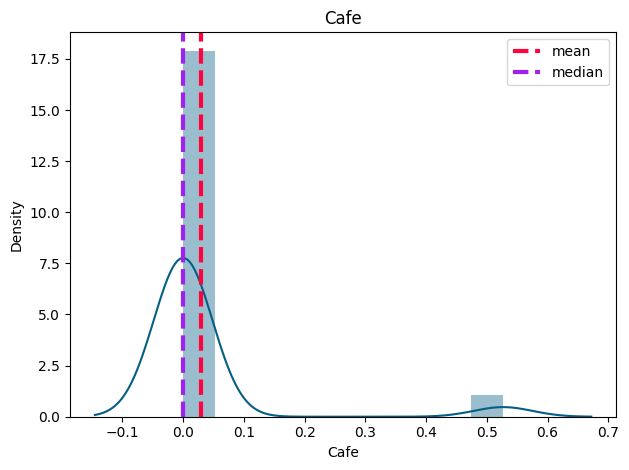

In [ ]:
# Transform Your data
for i,col in enumerate(['Cafe']) :
    sns.distplot(cluster_dummy[col], color = '#055E85');
    feature = cluster_dummy[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();


In [ ]:

print(cluster_dummy.columns)

Index(['Restaurant', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery',
       'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian',
       'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean',
       'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data


cluster_dummy.sample(5)

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
86,Tempteys,0,0,0,0,0,0,1,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,Owm Nom Nom,0,1,0,0,0,0,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
95,Tiki Shack,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,The Old Madras Baking Company,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,Prism Club & Kitchen,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:



cluster_dummy.dtypes


Restaurant        object
American           int64
Andhra             int64
Arabian            int64
Asian              int64
BBQ                int64
Bakery             int64
Beverages          int64
Biryani            int64
Burger             int64
Cafe             float64
Chinese            int64
Continental        int64
Desserts           int64
European           int64
Fast Food          int64
Finger Food        int64
Goan               int64
Healthy Food       int64
Hyderabadi         int64
Ice Cream          int64
Indonesian         int64
Italian            int64
Japanese           int64
Juices             int64
Kebab              int64
Lebanese           int64
Malaysian          int64
Mediterranean      int64
Mexican            int64
Mithai             int64
Modern Indian      int64
Momos              int64
Mughlai            int64
North Eastern      int64
North Indian       int64
Pizza              int64
Salad              int64
Seafood            int64
South Indian       int64


In [ ]:
#normalizing numerical columns

from sklearn.preprocessing import StandardScaler
numerical_cols = ['Cafe']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])


##### Which method have you used to scale you data and why?

I have scaled each feature/variable to unit variance and subtracted the mean using StandardScaler.


### 7. Dimesionality Reduction

In [ ]:

# print sample dataset
scaled_df.sample()


,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
74,Republic Of Noodles - Lemon Tree Hotel,0,0,0,1,0,0,0,0,0,-0.246183,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.decomposition import PCA


#applying pca to for the dimensionlty deduction

features = scaled_df.columns
features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])


PCA()

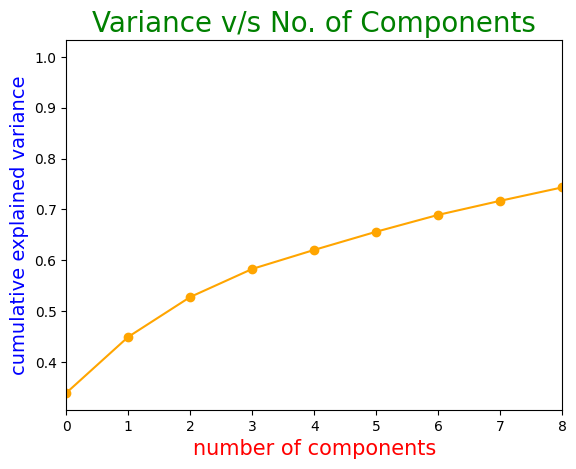

In [ ]:

#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()


In [ ]:

#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.33879578 0.11035476 0.07848179]
Cumulative variance explained by 3 principal components: 52.76%


In [ ]:

#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (105, 45)
transformed shape: (105, 3)


##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, as the dataset contains 40 or more features, it is crucial to employ dimensionality reduction techniques. This is due to the fact that clustering techniques get more computationally expensive as the number of characteristics grows. Furthermore, the "curse of dimensionality"—a condition in which data gets sparser and cluster identification more challenging—can result from excessive dimensionality. It is simpler to cluster and comprehend the results when there are less features in the data, which can be achieved with the aid of dimensionality reduction techniques like PCA, t-SNE, or LLE.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Since principal component analysis, or PCA, may find patterns in data that account for the majority of variation, it is an often used dimensionality reduction technique, which is why I chose to utilise it for my dimension reduction. These patterns, sometimes referred to as main components, are uncorrelated linear combinations of the original information. One can efficiently reduce the dimensionality of the data while retaining the majority of the critical information by using the top few principal components, which account for most of the variation in the data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#from text vectorization
try:
 X = X_tfidf
except KeyError:
 y = sentiment_df['Sentiment']

In [ ]:

sentiment_df.shape


(9955, 6)

In [ ]:
try:
 X = X_tfidf
except KeyError:
 y = sentiment_df['Sentiment']



from sklearn.model_selection import train_test_split
import pandas as pd

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Convert y to a DataFrame if it's a Series
if isinstance(y, pd.Series):
    y = y.to_frame()


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Perform train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Describes info about train and test set
# print("Shape of X: ", X_train.shape[0])
print("Shape of y: ", y_train.shape[0])
print("Shape of X: ", X_test.shape[0])
print("Shape of y: ", y_test.shape[0])


##### What data splitting ratio have you used and why?

since our dataset is large set of data having nearly 10lakh observations. So, we have assigned 80% data  into train set and 20% of data into test set with random_state=0 so that we do not get different observations in every split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as CIR = Nm/Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [ ]:
# Handling Imbalanced Dataset (If needed)
a = sentiment_df.sentiment.value_counts().reset_index()
a.columns = {'sentiment','Counts'}

In [ ]:
a = sentiment_df.sentiment.value_counts().reset_index()
a.columns = {'sentiment','Counts'}

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

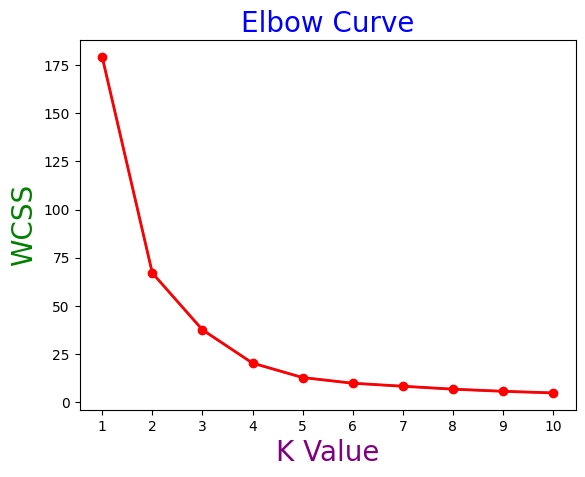

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)
# Predict on the model

# Elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

# Fit the Algorithm

# Predict on the model

For n_clusters = 2 average silhouette_score is : 0.7808234417777393
For n_clusters = 3 average silhouette_score is : 0.4565611540218943
For n_clusters = 4 average silhouette_score is : 0.5304805059661282
For n_clusters = 5 average silhouette_score is : 0.5403484717386025
For n_clusters = 6 average silhouette_score is : 0.5629442309560607
For n_clusters = 7 average silhouette_score is : 0.5671970140573342
For n_clusters = 8 average silhouette_score is : 0.5722520985053887
For n_clusters = 9 average silhouette_score is : 0.5811531939699707


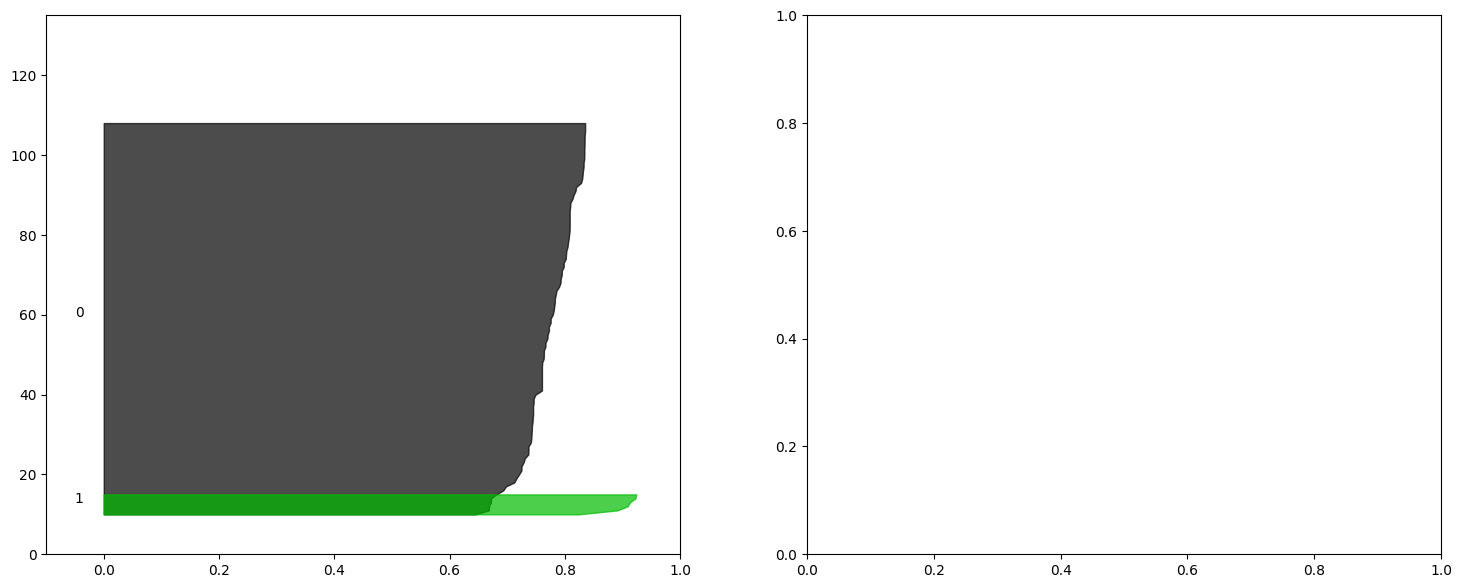

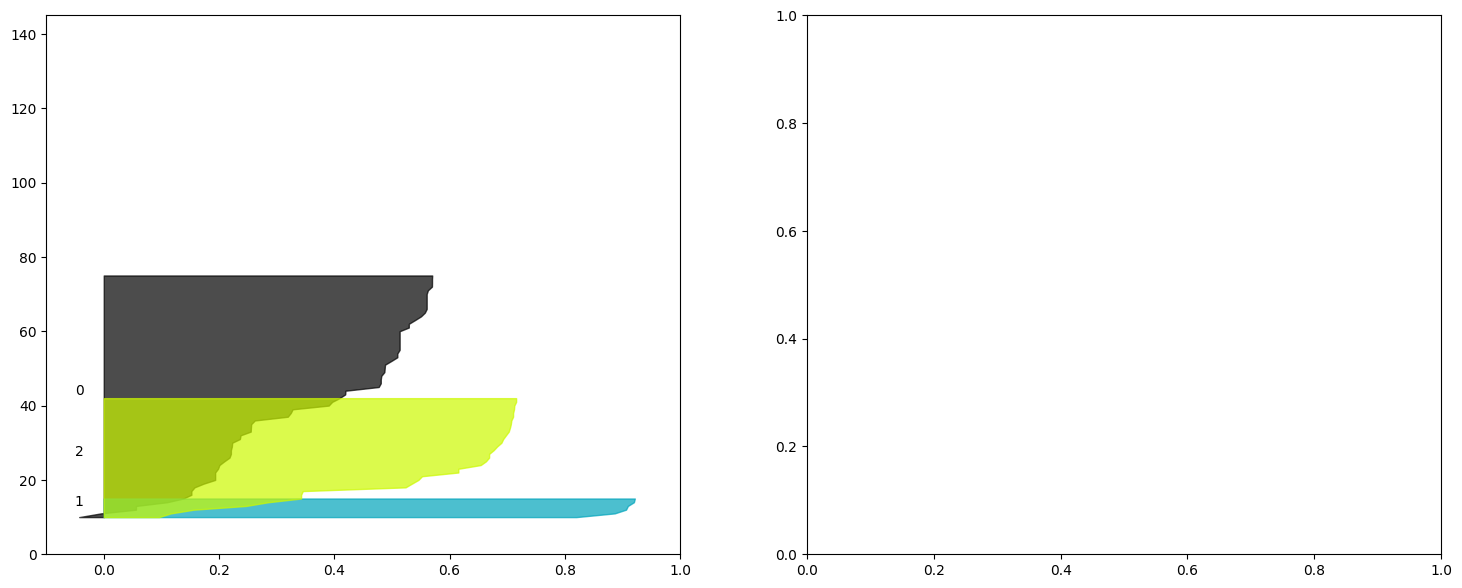

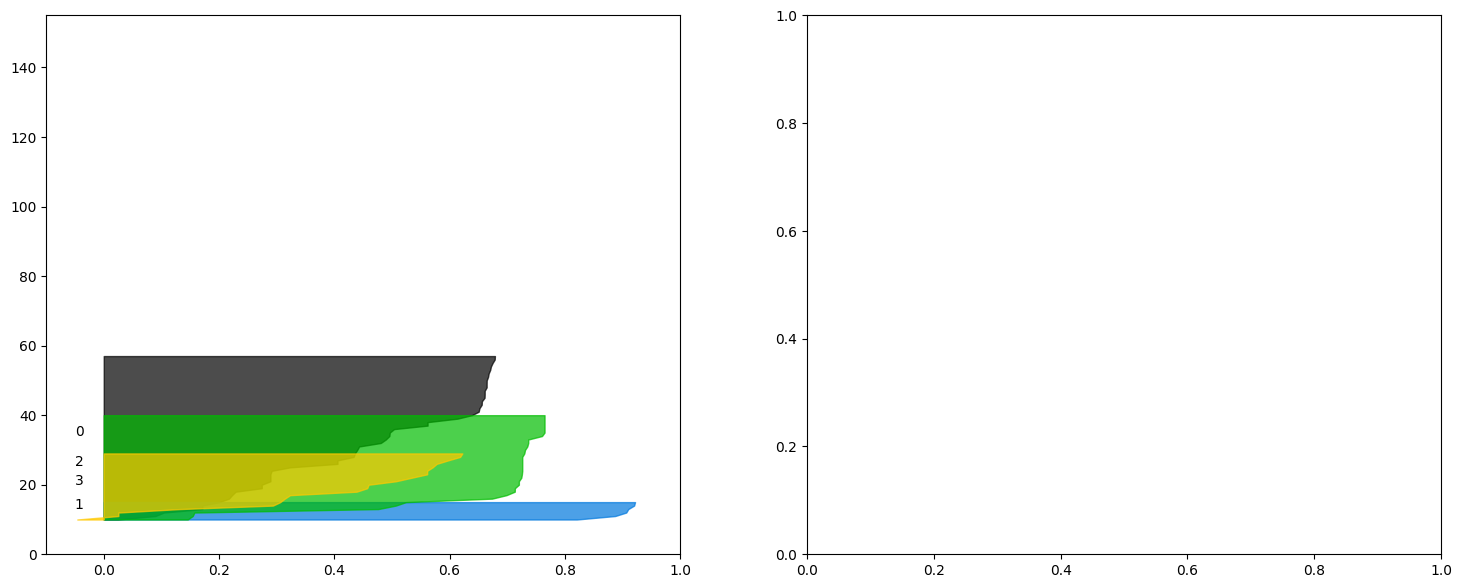

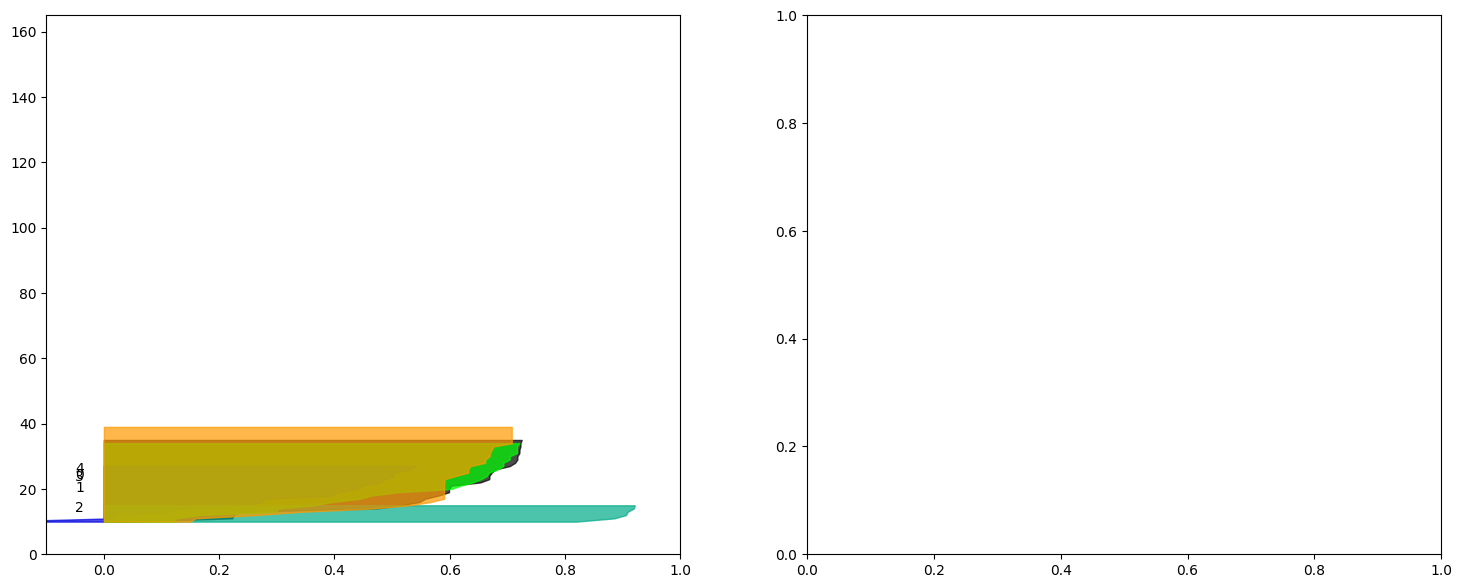

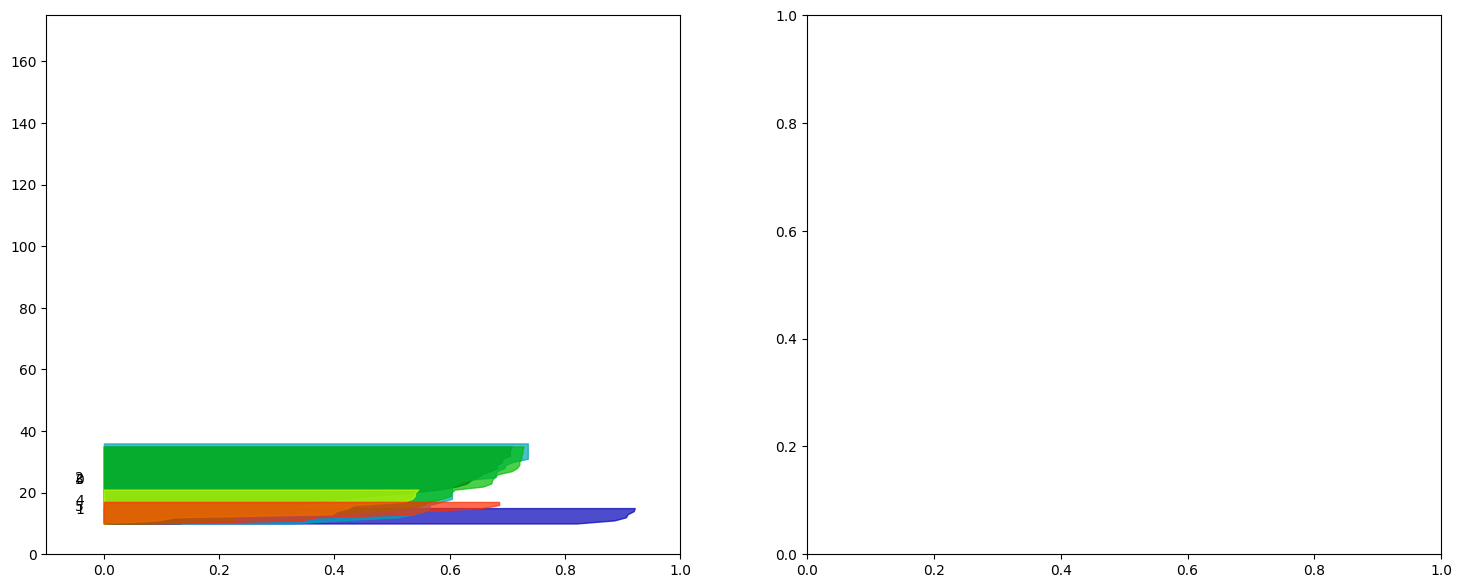

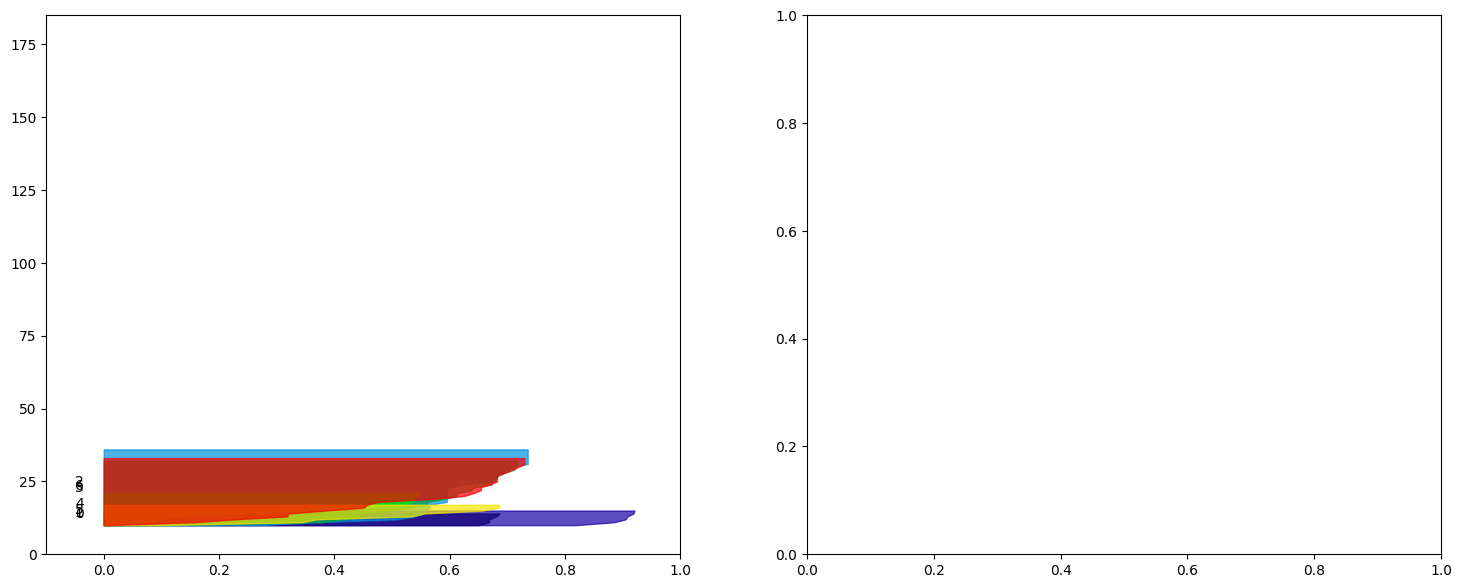

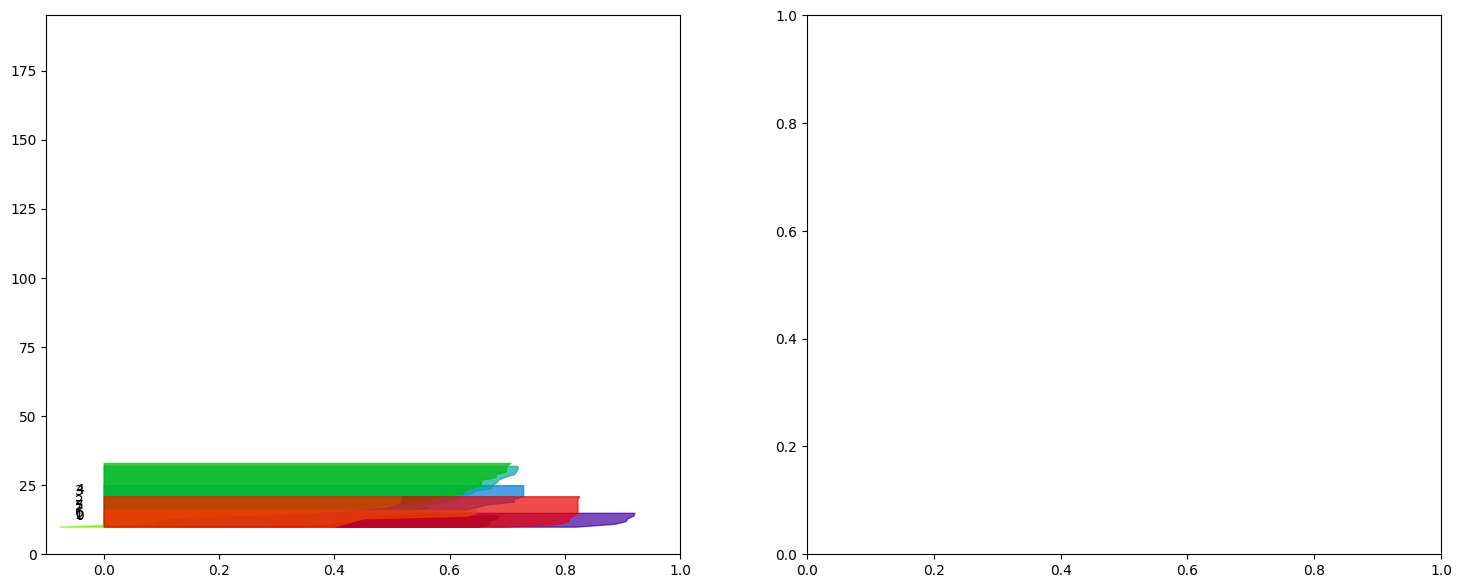

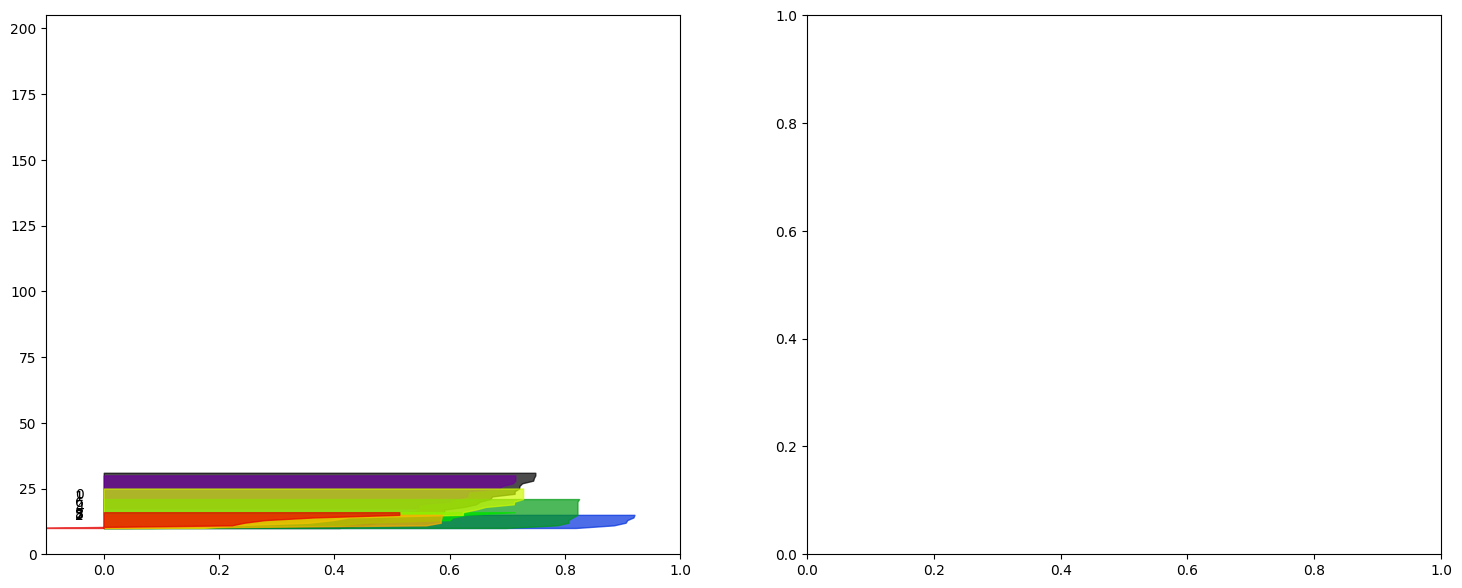

In [ ]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


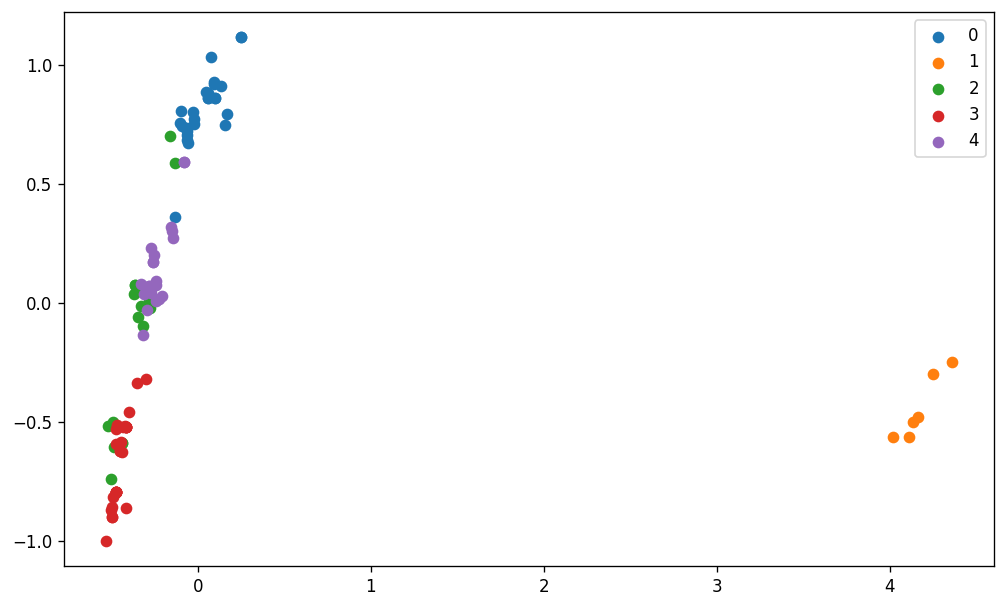

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()


# **ML Model - 1 Hierarchical Clustering**
#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Known alternatively as hierarchical cluster analysis, or HCA, hierarchical clustering is another unsupervised machine learning approach that groups the unlabeled datasets into clusters.

The dendrogram is the structure that results from developing the hierarchy of clusters in this algorithm in the shape of a tree.


There are two methods for using the hierarchical clustering technique:

Agglomerative :

Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

Divisive :

Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach

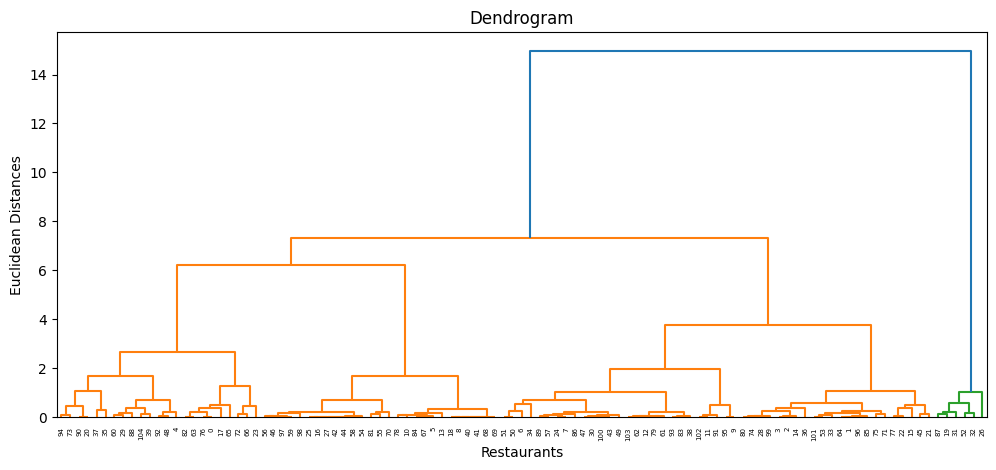

In [ ]:


# Code to find hierarchial clustering and vizualizing dendograms

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:

#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7808234417777393
For n_clusters = 3, silhouette score is 0.4266599151732391
For n_clusters = 4, silhouette score is 0.5243282186960323
For n_clusters = 5, silhouette score is 0.5248487999429544
For n_clusters = 6, silhouette score is 0.5516326514053845
For n_clusters = 7, silhouette score is 0.562765147800912
For n_clusters = 8, silhouette score is 0.566851000171035
For n_clusters = 9, silhouette score is 0.5797496793539659
For n_clusters = 10, silhouette score is 0.5973812770434299
For n_clusters = 11, silhouette score is 0.590885061713942
For n_clusters = 12, silhouette score is 0.6001421617778071
For n_clusters = 13, silhouette score is 0.57035131553189
For n_clusters = 14, silhouette score is 0.5484496855089431
For n_clusters = 15, silhouette score is 0.5410924559006133


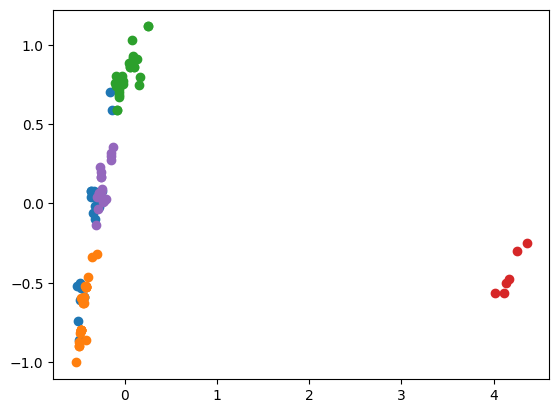

Silhouette Coefficient: 0.525
davies_bouldin_score 0.584


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)


##### Which hyperparameter optimization technique have you used and why?

KMeans Clustering

I used K means clustering to group the restaurants according to the specified characteristics. We found that n clusters = 6 worked best for our model after using both the Elbow and Silhuoette Methods to get an efficient number of K. After that, the model was fitted using K means, and K means.labels were used to identify each data point's cluster of origin. Following the clusters' naming, we observed them and



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2  Sentiment Analysis

 Linear Discriminant analysis is one of the most popular dimensionality reduction techniques used for supervised classification problems in machine learning. It is also considered a pre-processing step for modeling differences in ML and applications of pattern classification.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Import pyldavis to visualise
!pip install pyLDAvis
!pip install scikit-learn

!pip install pyLDAvis
import pyLDAvis
# import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


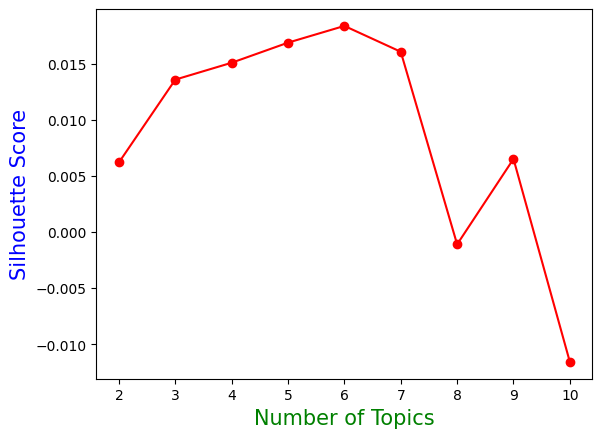

In [ ]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()


In [ ]:
import nltk.corpus
# LDA model
lda = LatentDirichletAllocation(n_components=4)

lda.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4)

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
#Import pyldavis to visualise
!pip install pyLDAvis
!pip install scikit-learn

!pip install pyLDAvis
import pyLDAvis
# import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Fit the Algorithm

# Predict on the model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.1 MB/s eta 0:00:00


In [ ]:

#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


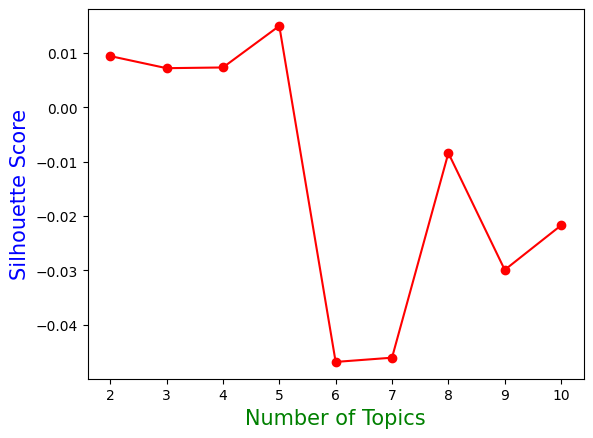

In [ ]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

LDA lacks predetermined labels and is an unsupervised learning algorithm. The labels are given out in accordance with the word analysis, word weights, and word context for each topic. Since the anticipated topic is not a definitive response, additional research should be done on various methods, such as employing supervised algorithms and aggregating the outcomes to produce sentiment labelling that is more accurate.

### 2. Which hyperparameter optimization technique have you used and why?

As a hyperparameter optimization technique I used GridSearchCV because it uses all possible combinations of hyperparameters and gives more accurate results. It then calculates the performance of each combination and chooses the best value for the hyperparameters. This provides the most accurate tuning method.

### 3.Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The following metrics were employed by me to assess the model's effect on business:

Accuracy: Out of all the examples, this metric shows the proportion of correctly classified instances. This would show the model's overall efficacy in producing accurate predictions in a business scenario. The firm would benefit from a high accuracy score since it would show that the model's predictions can be trusted.

Precision: Out of all the positive predictions the model makes, this indicator shows the percentage of real positive forecasts. This would represent the degree of trust in the model's accuracy in identifying positive situations in a business context. A high precision rating would be advantageous.This would indicate that the model does not make false positive predictions.

Recall: This metric shows the proportion of true positive predictions out of all true positives. In a business environment, this would show the ability of the model to detect all positive cases. A high recovery score would have a positive impact on the company because it would show that no positive cases are missing from the model.

F1 score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business environment, this would show the overall effectiveness of the model in making correct predictions while avoiding false positives and false negatives. A high F1 score would have a positive impact on the company, as it would show that the model makes accurate predictions, while being able to detect all positive cases..

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Clustering and sentiment analysis were performed from the Customer Reviews dataset of Zomato's food delivery service. The purpose of this analysis was to understand the customer experience and gain insight into their feedback.

A clustering technique was applied to group customer reviews based on text and found that customers clustered into two clusters: positive and negative. This gave a general idea of ​​the level of customer satisfaction, with a positive cluster indicating the highest level of satisfaction and a negative cluster indicating the lowest level of satisfaction.


Sentiment analysis was then used to classify the evaluation text as positive or negative. This provided a more accurate view of customer feedback and helped identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer experience with Zomato.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***